# Machine Learning Engineer Nanodegree

Capstone Project


Moataz Khaled Ragab Abdelaziz 

# Project Overview

Every year many students graduate from their university seeking for a master degree to obtain to help them in their career, but the problem is how to choose the best students for the master degree we can classify them through their grades in (TOEFL, GRE, GPA or calculating their chance of admission). So, to choose the best students we need to classify them from the best to worse so it can be easy for the university to choose them to solve this problem using classification I used supervised learning where the Supervised learning is the machine learning task of learning a function that maps an input to an output based on example input-output pairs. It infers a function from labeled training data consisting of a set of training example. In supervised learning, each example is a pair consisting of an input object (typically a vector) and a desired output value (also called the supervisory signal). A supervised learning algorithm analyzes the training data and produces an inferred function, which can be used for mapping new examples. An optimal scenario will allow for the algorithm to correctly determine the class labels for unseen instances. This requires the learning algorithm to generalize from the training data to unseen situations in a "reasonable" way.

# Problem Statement

The dataset was about scores for graduates who want to apply for a master degree and we want to know how many candidates will be accepted for the master degree. The problem will be solved using classification trying to classify the students through their chance of admission.

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB




# Importing the Data

In [17]:
data = pd.read_csv('D:/Machine Learning/Capstone/graduate-admissions/Graduate.csv')

# Data Exploration

In [5]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


# Visulaization 

Students with HIGH CGPA have High TOEFL Score

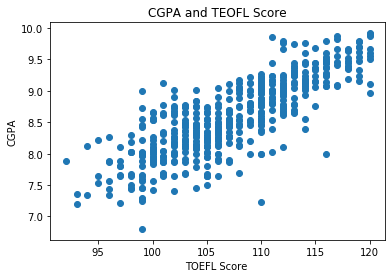

In [6]:
plt.scatter(data["TOEFL Score"],data.CGPA)
# x-axis label 
plt.xlabel('TOEFL Score ') 
# frequency label 
plt.ylabel('CGPA') 
# plot title 
plt.title('CGPA and TEOFL Score')  
plt.show() 

Students with High GRE Score have High TOEFL Score

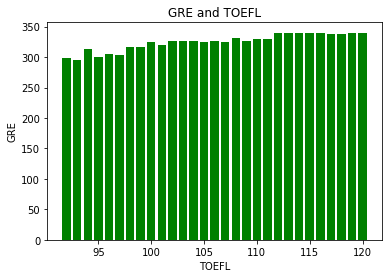

In [7]:
TOEFL = data["TOEFL Score"]
GRE = data["GRE Score"]

plt.bar(TOEFL, GRE,
         color = [ 'green']) 
  
# naming the x-axis 
plt.xlabel('TOEFL') 
# naming the y-axis 
plt.ylabel('GRE') 
# plot title 
plt.title('GRE and TOEFL') 
  
# function to show the plot 
plt.show() 

Most of the students with high Chance of admit came from Universities with rating 4 out of 5

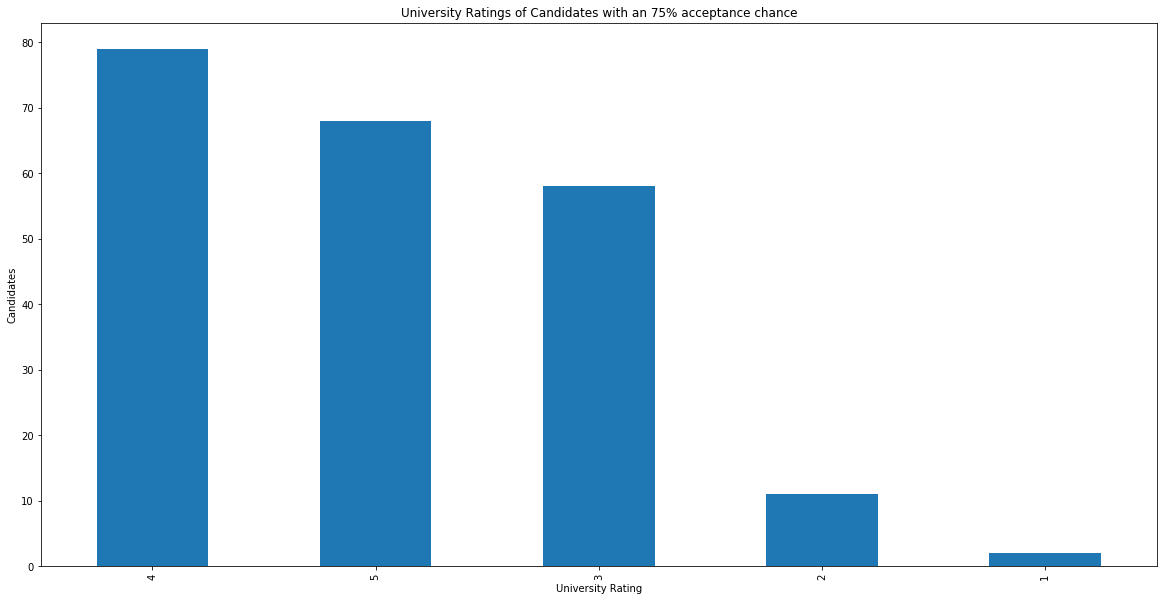

In [8]:
Plot = data[data["Chance of Admit "] >= 0.75]["University Rating"].value_counts().head(5)
plt.title("University Ratings of Candidates with an 75% acceptance chance")
Plot.plot(kind='bar',figsize=(20, 10))
plt.xlabel("University Rating")
plt.ylabel("Candidates")
plt.show()


The Higher the CGPA the higher the Letter of Recommendation

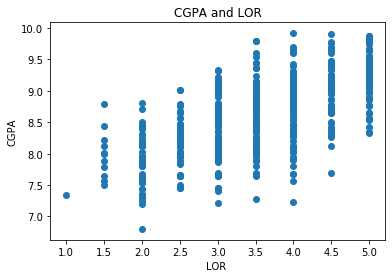

In [9]:
plt.scatter(data["LOR "],data.CGPA)
# x-axis label 
plt.xlabel('LOR ') 
# frequency label 
plt.ylabel('CGPA') 
# plot title 
plt.title('CGPA and LOR')  
plt.show() 

Students with High CGPA have High GRE Score

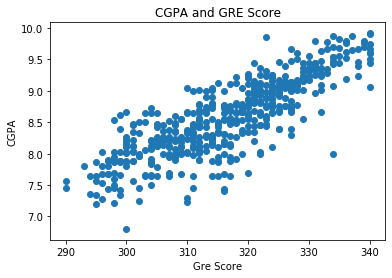

In [10]:
plt.scatter(data["GRE Score"],data.CGPA)
# x-axis label 
plt.xlabel('Gre Score') 
# frequency label 
plt.ylabel('CGPA') 
# plot title 
plt.title('CGPA and GRE Score')  
plt.show() 

# Splitting The Data and Normalizing it

In [11]:
# separating train (80%) and test (%20) sets

y = data["Chance of Admit "].values
x = data.drop(["Chance of Admit "],axis=1)

from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size = 0.20,random_state = 42)

print("Training set has {} samples.".format(x_train.shape[0]))
print("Testing set has {} samples.".format(x_test.shape[0]))
# normalization
from sklearn.preprocessing import MinMaxScaler
scalerX = MinMaxScaler(feature_range=(0, 1))
x_train[x_train.columns] = scalerX.fit_transform(x_train[x_train.columns])
x_test[x_test.columns] = scalerX.transform(x_test[x_test.columns])

y_train_01 = [1 if each > 0.8 else 0 for each in y_train]
y_test_01  = [1 if each > 0.8 else 0 for each in y_test]

# list to array
y_train_01 = np.array(y_train_01)
y_test_01 = np.array(y_test_01)
                  

Training set has 400 samples.
Testing set has 100 samples.


C:\Users\EGYPT\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\EGYPT\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\EGYPT\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/

# Classification Algorithm

Using AdaBoostClassifier to classify the students through their chance of admission.

In [12]:
clf = AdaBoostClassifier()
                         
clf.fit(x_train, y_train_01)
print("score: ", clf.score(x_test,y_test_01))
print("precision_score: ", precision_score(y_test_01,clf.predict(x_test)))
print("recall_score: ", recall_score(y_test_01,clf.predict(x_test)))
print("f1_score: ",f1_score(y_test_01,clf.predict(x_test)))

score:  0.91
precision_score:  0.8
recall_score:  0.8888888888888888
f1_score:  0.8421052631578948


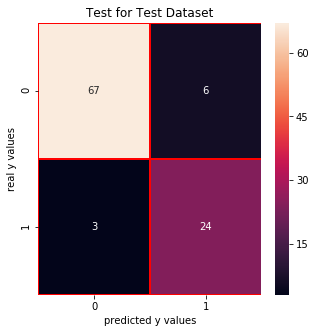

In [13]:
from sklearn.metrics import confusion_matrix
cm_nb = confusion_matrix(y_test_01,clf.predict(x_test))

# print("y_test_01 == 1 :" + str(len(y_test_01[y_test_01==1]))) # 29
# cm visualization
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_nb,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

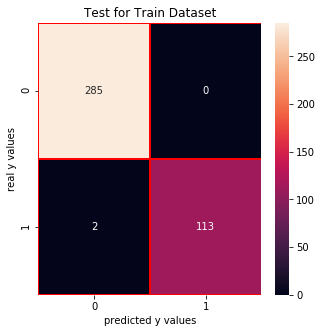

In [14]:
cm_nb_train = confusion_matrix(y_train_01,clf.predict(x_train))
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_nb_train,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.title("Test for Train Dataset")
plt.show()

# BenchMark

As it was a dataset on Kaggle many people worked on it and tried to get the highest score one so I will use on of the score to be my bench mark and compare its score to mine. The benchmark that I will use is using more than one classifier but I will compare my result with the highest classifier score it get I will use a classifier that is never used in the benchmark. The highest score for a classifier in the benchmark was Gaussian Naïve Bayes its score was:

In [21]:
XB = GaussianNB()
                         
XB.fit(x_train, y_train_01)
print("score: ", XB.score(x_test,y_test_01))
print("precision_score: ", precision_score(y_test_01,XB.predict(x_test)))
print("recall_score: ", recall_score(y_test_01,XB.predict(x_test)))
print("f1_score: ",f1_score(y_test_01,XB.predict(x_test)))

score:  0.93
precision_score:  0.7941176470588235
recall_score:  1.0
f1_score:  0.8852459016393442


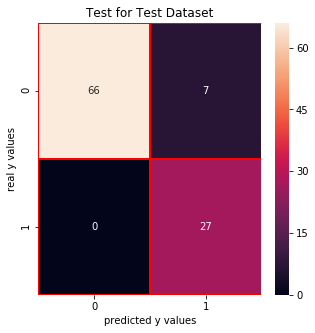

In [28]:
from sklearn.metrics import confusion_matrix
XB_nb = confusion_matrix(y_test_01,XB.predict(x_test))

# print("y_test_01 == 1 :" + str(len(y_test_01[y_test_01==1]))) # 29
# cm visualization
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(XB_nb,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

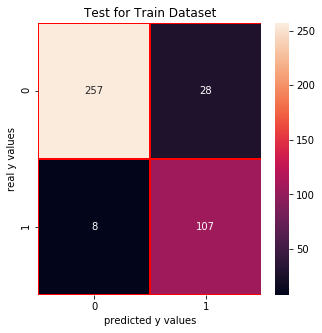

In [29]:
XB_nb_train = confusion_matrix(y_train_01,XB.predict(x_train))
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(XB_nb_train,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.title("Test for Train Dataset")
plt.show()